# Basement Exploratory Analysis

## Motivation:
In this notebook, I explore the basement features to find potential correlations, multicollinearities and filter out features that might harm the predicitve model.

In [107]:
import pandas as pd

In [108]:
raw_data = pd.read_csv('data/Ames_Housing_Price_Data.csv')

In [109]:
# Select only a subset of the original data
# i.e., only features related to basement along with the SalePrice and Neighbourhood
basementDF = raw_data[['PID','SalePrice','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Neighborhood']]
basementDF.head()

,PID,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Neighborhood
0,909176150,126000,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,SWISU
1,905476230,139500,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,Edwards
2,911128020,124900,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,IDOTRR
3,535377150,114000,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,OldTown
4,534177230,227000,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,NWAmes


### Data Description
**Dictionary**
- *PID:* Unique ID to identify residence

- *SalePrice:* The price the house was sold at

- *BsmtQual:* Evaluates the height of the basement

- *BsmtCond:* Evaluates the general condition of the basement

- *BsmtExposure:* Refers to walkout or garden level walls

- *BsmtFinType1:* Rating of basement finished area

- *BsmtFinSF1:* Type 1 finished square feet

- *BsmtFinType2:* Rating of basement finished area (if multiple types)

- *BsmtFinSF2:* Type 2 finished square feet

- *BsmtUnfSF:* Unfinished square feet of basement area

- *TotalBsmtSF:* Total square feet of basement area

- *Neighborhood:* Physical locations within Ames city limits


**Correlation:**

In [110]:
# Plot the correlation Matrix without the PID
basementDF.iloc[:,1:-1].corr()

,SalePrice,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
SalePrice,1.000000,0.460792,0.022520,0.167519,0.652222
BsmtFinSF1,0.460792,1.000000,-0.058911,-0.480927,0.512642
BsmtFinSF2,0.022520,-0.058911,1.000000,-0.242334,0.110119
BsmtUnfSF,0.167519,-0.480927,-0.242334,1.000000,0.421573
TotalBsmtSF,0.652222,0.512642,0.110119,0.421573,1.000000


 Observations:
 
 1. As expected, there is a pretty strong negative relationship between Finished Square Footage and Unfinished Square Footage.

 2. The somewhat strong postive correlation in {TotalBsmtSF, SalePrice} and {BsmtFinSF1, SalePrice} hints that they are important features to be considered.


### Feature Engineering

Many of the categorical features describe the state of the basement or something related to it. They are encoded in such a way that there is an order, for e.g., the code goes from Excellent to Poor. Therefore,  I will transform those categorical variables with a range of numbers with equal distance between levels and the highest number representing the best condition and zero representing 'no basement'.

In [111]:
basementDF.BsmtQual = basementDF['BsmtQual'].fillna(0)
basementDF.BsmtQual = basementDF.BsmtQual.replace(to_replace='Ex', value=5)
basementDF.BsmtQual = basementDF.BsmtQual.replace(to_replace='Gd', value=4)
basementDF.BsmtQual = basementDF.BsmtQual.replace(to_replace='TA', value=3)
basementDF.BsmtQual = basementDF.BsmtQual.replace(to_replace='Fa', value=2)
basementDF.BsmtQual = basementDF.BsmtQual.replace(to_replace='Po', value=1)

basementDF.BsmtCond = basementDF['BsmtCond'].fillna(0)
basementDF.BsmtCond = basementDF.BsmtCond.replace(to_replace='Ex', value=5)
basementDF.BsmtCond = basementDF.BsmtCond.replace(to_replace='Gd', value=4)
basementDF.BsmtCond = basementDF.BsmtCond.replace(to_replace='TA', value=3)
basementDF.BsmtCond = basementDF.BsmtCond.replace(to_replace='Fa', value=2)
basementDF.BsmtCond = basementDF.BsmtCond.replace(to_replace='Po', value=1)

basementDF.BsmtExposure = basementDF['BsmtExposure'].fillna(0)
basementDF.BsmtExposure = basementDF.BsmtExposure.replace(to_replace='Gd', value=4)
basementDF.BsmtExposure = basementDF.BsmtExposure.replace(to_replace='Av', value=3)
basementDF.BsmtExposure = basementDF.BsmtExposure.replace(to_replace='Mn', value=2)
basementDF.BsmtExposure = basementDF.BsmtExposure.replace(to_replace='No', value=1)


basementDF.BsmtFinType1 = basementDF['BsmtFinType1'].fillna(0)
basementDF.BsmtFinType1 = basementDF.BsmtFinType1.replace(to_replace='GLQ', value=6)
basementDF.BsmtFinType1 = basementDF.BsmtFinType1.replace(to_replace='ALQ', value=5)
basementDF.BsmtFinType1 = basementDF.BsmtFinType1.replace(to_replace='BLQ', value=4)
basementDF.BsmtFinType1 = basementDF.BsmtFinType1.replace(to_replace='Rec', value=3)
basementDF.BsmtFinType1 = basementDF.BsmtFinType1.replace(to_replace='LwQ', value=2)
basementDF.BsmtFinType1 = basementDF.BsmtFinType1.replace(to_replace='Unf', value=1)

basementDF.BsmtFinType2 = basementDF['BsmtFinType2'].fillna(0)
basementDF.BsmtFinType2 = basementDF.BsmtFinType2.replace(to_replace='GLQ', value=6)
basementDF.BsmtFinType2 = basementDF.BsmtFinType2.replace(to_replace='ALQ', value=5)
basementDF.BsmtFinType2 = basementDF.BsmtFinType2.replace(to_replace='BLQ', value=4)
basementDF.BsmtFinType2 = basementDF.BsmtFinType2.replace(to_replace='Rec', value=3)
basementDF.BsmtFinType2 = basementDF.BsmtFinType2.replace(to_replace='LwQ', value=2)
basementDF.BsmtFinType2 = basementDF.BsmtFinType2.replace(to_replace='Unf', value=1)

**Removing Neighborhoods**

Some Neighborhoods listed in the dataset is of no concern to us because they are outside the city limits. I will drop them.

In [112]:
basementDF = basementDF[basementDF['Neighborhood'] != 'Landmrk']
basementDF = basementDF[basementDF['Neighborhood'] != 'GrnHill']
basementDF = basementDF[basementDF['Neighborhood'] != 'Greens']

**New Correlation Matrix**

In [114]:
basementDF.iloc[:,1:-1].corr()

,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
SalePrice,1.000000,0.590860,0.209943,0.412523,0.353344,0.460559,0.022868,0.022457,0.169200,0.653464
BsmtQual,0.590860,1.000000,0.629673,0.425870,0.438369,0.344086,0.113126,0.001227,0.212267,0.568942
BsmtCond,0.209943,0.629673,1.000000,0.261910,0.317845,0.184930,0.235200,0.086696,0.161829,0.390141
BsmtExposure,0.412523,0.425870,0.261910,1.000000,0.368366,0.406315,0.143767,0.118462,-0.061020,0.403994
BsmtFinType1,0.353344,0.438369,0.317845,0.368366,1.000000,0.714646,0.090552,0.016620,-0.377697,0.355996
BsmtFinSF1,0.460559,0.344086,0.184930,0.406315,0.714646,1.000000,-0.013919,-0.059935,-0.480427,0.512312
BsmtFinType2,0.022868,0.113126,0.235200,0.143767,0.090552,-0.013919,1.000000,0.804074,-0.196219,0.121538
BsmtFinSF2,0.022457,0.001227,0.086696,0.118462,0.016620,-0.059935,0.804074,1.000000,-0.241996,0.109515
BsmtUnfSF,0.169200,0.212267,0.161829,-0.061020,-0.377697,-0.480427,-0.196219,-0.241996,1.000000,0.422377
TotalBsmtSF,0.653464,0.568942,0.390141,0.403994,0.355996,0.512312,0.121538,0.109515,0.422377,1.000000


### Visual Test of Linearity

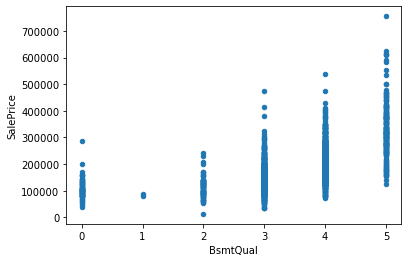

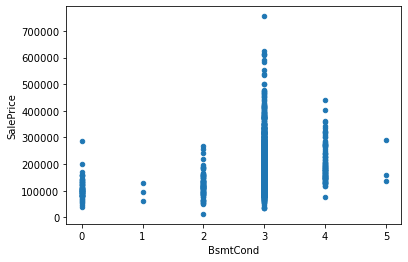

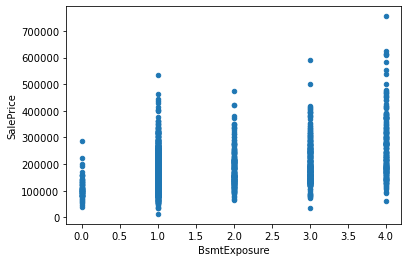

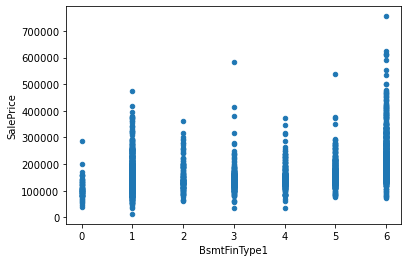

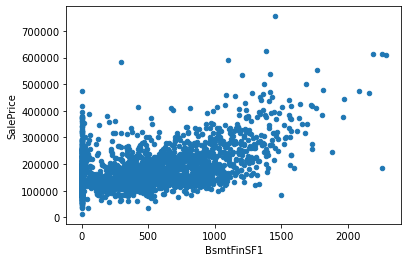

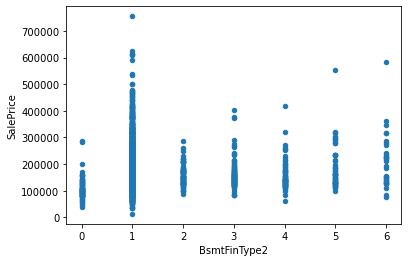

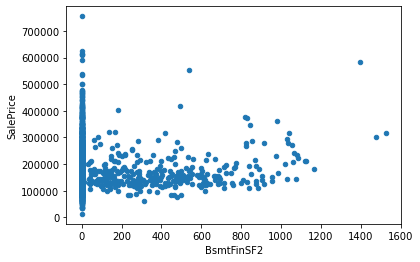

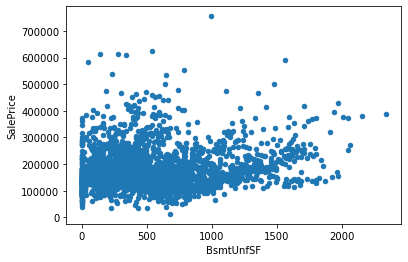

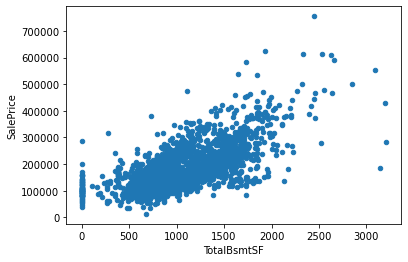

In [123]:
for col in basementDF.columns:
    if col == 'PID' or col == 'SalePrice' or col == 'Neighborhood':
        continue
    
    basementDF.plot(kind='scatter', x=col, y='SalePrice')

In [124]:
basementDF[['SalePrice', 'BsmtCond']].groupby('BsmtCond').mean('SalePrice').reset_index()



,BsmtCond,SalePrice
0,0,107561.235294
1,1,95133.333333
2,2,122382.875000
3,3,180969.947528
4,4,206709.128713
5,5,195000.000000


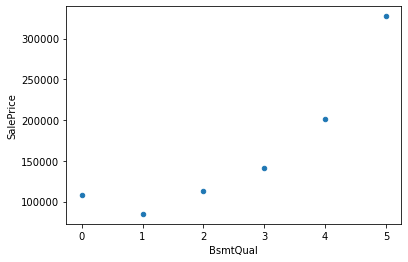

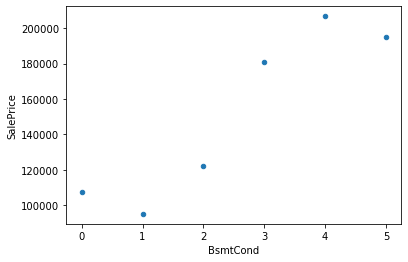

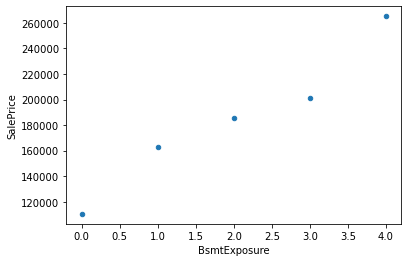

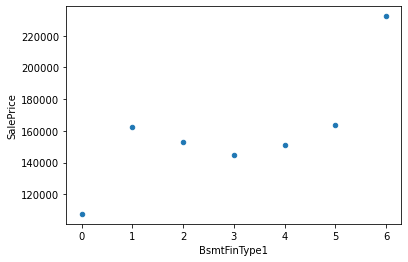

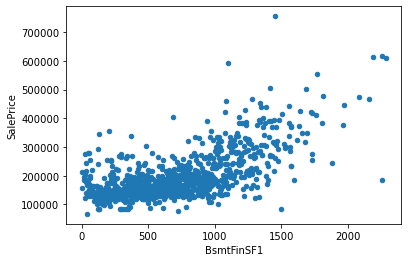

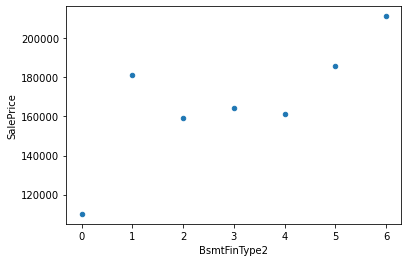

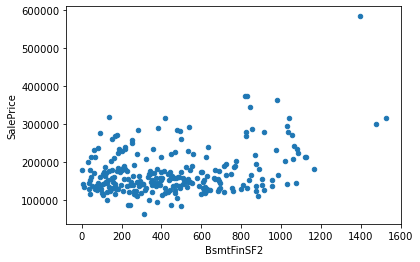

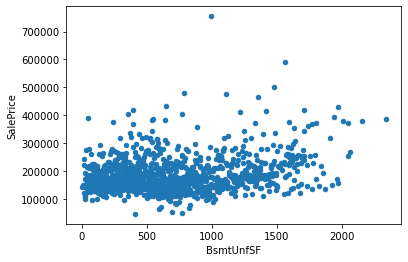

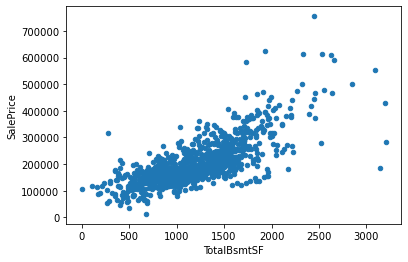

In [127]:
for col in basementDF.columns:
    if col == 'PID' or col == 'SalePrice' or col == 'Neighborhood':
        continue
    
    df = basementDF[['SalePrice', col]].groupby(col).mean('SalePrice').reset_index()
    df.plot(kind = 'scatter', x = col, y = 'SalePrice')

Dropping some missing values

In [216]:
basementDF = basementDF[basementDF.BsmtFinSF1.notna()] # 1 obs dropped

For some of the features, there is a strong linear relationship with SalePrice, but for some others, the relationship is weaker.

I will fit some models to analyze which feature selection gives the best results.

First, I try a linear model with all the variables:

$\hat{y} = \beta_{0} + \beta_{1}BsmtQual + \beta_{2}BsmtCond+ \beta_{3}BsmtExposure+ \beta_{4}BsmtFinType1+ \beta_{5}BsmtFinSF1+ \beta_{6}BsmtFinType2+ \beta_{7}BsmtFinSF2+ \beta_{8}BsmtUnfSF+ \beta_{9}TotalBsmtSF$


In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ols = LinearRegression()

X = basementDF.iloc[:, 2:-1]
y = basementDF['SalePrice']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.85)

ols.set_params(fit_intercept=True)

ols.fit(Xtrain, ytrain)



LinearRegression()

In [218]:
R_square = ols.score(Xtest, ytest)
R_square

0.607762659234147

The $R^2$ value is pretty good but I suspect multicollinearity. I test for it.

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X1 =  add_constant(X)

pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)


const           29.350531
BsmtQual         2.358155
BsmtCond         1.780682
BsmtExposure     1.392391
BsmtFinType1     2.395038
BsmtFinSF1            inf
BsmtFinType2     3.090069
BsmtFinSF2            inf
BsmtUnfSF             inf
TotalBsmtSF           inf
dtype: float64

As expected, there are many features will a lot of multicollinearity, so I decided to drop them.

In [220]:
X1 = X.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], axis=1, inplace=False)

Now I run a Multiple Linear Regression with the remaining variables.

$\hat{y} = \beta_{0} + \beta_{1}BsmtQual + \beta_{2}BsmtCond+ \beta_{3}BsmtExposure+ \beta_{4}BsmtFinType1+ \beta_{5}BsmtFinType2+ \beta_{6}TotalBsmtSF$

In [221]:
ols2 = LinearRegression()
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y, train_size=0.85)

ols2.set_params(fit_intercept=True)

ols2.fit(Xtrain, ytrain)

R_square = ols2.score(Xtest, ytest)
R_square

0.3523725357642957

The $R^2$ is really low. Let's check for multicollinearity again.

In [222]:
X2 =  add_constant(X1)

pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

const           29.178045
BsmtQual         2.004079
BsmtCond         1.732909
BsmtExposure     1.299817
BsmtFinType1     1.306807
BsmtFinType2     1.073393
dtype: float64

Seems good with no values over 5

Here, I decide to approach a more unconventional form of the linear regression. From the above plots, I make an educated guess that the true relationship between some of the variables and the target might not be linear but cubic and quartic. So I transformed the concerned variables and fit the regression again. The equation is as follows:

$\hat{y} = \beta_{0} + \beta_{1}BsmtQual + \beta_{2}BsmtCond + \beta_{3}BsmtCond^2 + \beta_{4}BsmtCond^3 + \beta_{5}BsmtExposure+ \beta_{6}BsmtExposure^2+ \beta_{7}BsmtExposure^3+ \beta_{8}BsmtExposure^4+ \beta_{9}BsmtFinType1+ \beta_{10}BsmtFinType2+ \beta_{11}TotalBsmtSF$



In [223]:
#Cubic regression
X_non_linear = X.copy()
X_non_linear['Condition_Square'] = X_non_linear['BsmtCond']**2
X_non_linear['Condition_cube'] = X_non_linear['BsmtCond']**3
X_non_linear['Exposure_Square'] = X_non_linear['BsmtExposure']**2
X_non_linear['Exposure_cube'] = X_non_linear['BsmtExposure']**3
X_non_linear['Exposure_quartic'] = X_non_linear['BsmtExposure']**4

X_non_linear

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Condition_Square,Condition_cube,Exposure_Square,Exposure_cube,Exposure_quartic
0,3,3,1,3,238.0,1,0.0,618.0,856.0,9,27,1,1,1
1,4,3,2,6,552.0,5,393.0,104.0,1049.0,9,27,4,8,16
2,3,3,1,5,737.0,1,0.0,100.0,837.0,9,27,1,1,1
3,2,3,1,1,0.0,1,0.0,405.0,405.0,9,27,1,1,1
4,4,3,1,6,643.0,1,0.0,167.0,810.0,9,27,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,3,3,1,1,0.0,1,0.0,952.0,952.0,9,27,1,1,1
2576,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0
2577,3,3,1,4,284.0,1,0.0,717.0,1001.0,9,27,1,1,1
2578,4,3,1,6,841.0,1,0.0,144.0,985.0,9,27,1,1,1


In [224]:
ols3 = LinearRegression()

y = basementDF['SalePrice']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_non_linear, y, train_size=0.85)

ols3.set_params(fit_intercept=True)

ols3.fit(Xtrain, ytrain)

R_square = ols3.score(Xtest, ytest)
R_square

0.6512909991621391

The $R^2$ is pretty good but let's check for the adjusted value.

In [225]:
adj_R_square = 1 - (1-ols3.score(Xtest, ytest))*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)
adj_R_square

0.6381321689418424

Good $Adj  R^2$

In [ ]:
#To_Do: See how making such a change affects the model.